# Bitcoin Stock Prediction Using Deep Learning and Sentiment Analysis
---

### This notebook analyzes Bitcoin historical values and how we can predict next values for Bitcoin closing prices

## Introduction

### What is a crypto currency  and why Bitcoin?

According to wikipedia, a cryptocurrency is a digital asset designed to work as a medium of exchange using "cryptography" to secure the transactions and to control the creation of additional units of the currency by "mining". 

While the best-known example of a cryptocurrency is Bitcoin, there are more than 100 other tradable cryptocurrencies, called altcoins (meaning alternative to Bitcoin), competing each other and with Bitcoin. 

The motive behind this competition is that there are a number of design flaws in Bitcoin, and people are trying to invent new coins to overcome these defects hoping their inventions will eventually replace Bitcoin. 

To June 2017, the total market capital of all cryptocurrencies is 102 billion in USD, 41 of which is of Bitcoin. Therefore, regardless of its design faults, Bitcoin is still the dominant cryptocurrency in markets. As a result, many altcoins cannot be bought with fiat currencies, but only be traded against Bitcoin. 

Hence, I chose Bitcoin as my commodity in order to make wiser future investments for my cryptocurrency portfolio.

The ubiquity of Internet access has triggered the emergence of currencies distinct from those used in the prevalent monetary system. The advent of cryptocurrencies based on a unique method called “mining” has brought about significant changes in the online economic activities of users.

Cryptocurrencies are primarily characterized by fluctuations in their price and number of transactions [\[1\]](#ref1)[\[2\]](#ref2). Although Bitcoin was first introduced in 2008 [\[2\]](#ref2)[\[3\]](#ref3), it had witnessed no significant fluctuation in its price and number of transactions until the end of 2013 [\[2\]](#ref2), when it began to garner worldwide attention, and witnessed a significant rise and fluctuation in its price and number of transactions. Such unstable fluctuations have served as an opportunity for speculation for some users while hindering most others from using cryptocurrencies [\[1\]](#ref1)[\[4\]](#ref4)[\[5\]](#ref5)

## Methods

My research will follow a comparative approach. My first framework is a Recurrent Neural Network trained on 3 popular stock market indicators and past prices as key data points to find an optimal technique for cryptocurrency stock market prediction. 

My second framework is a sequential model, trained on the sentiment of the public company news history and past prices as key data points, consisting of a single Long Short-Term Memory (LSTM) layer to generate a prediction vector for the whole input sequence and 1 Linear Dense Layer to aggregate the data into a single value.

Comparison will be made on the basis of their performance. Both techniques have some advantages and disadvantages. My research will analyze advantages and limitations of these techniques to find which technique is comparatively better for specifically Bitcoin stock market prediction. 

## Background

In a traditional recurrent neural network, during the gradient back-propagation phase, the gradient signal can end up being multiplied a large number of times (as many as the number of time steps) by the weight matrix associated with the connections between the neurons of the recurrent hidden layer. This means that, the magnitude of weights in the transition matrix can have a strong impact on the learning process.

If the weights in this matrix are small (or, more formally, if the leading eigenvalue of the weight matrix is smaller than 1.0), it can lead to a situation called vanishing gradients where the gradient signal gets so small that learning either becomes very slow or stops working altogether. It can also exacerbate the task of learning long-term dependencies in the data. Conversely, if the weights in this matrix are large (or, again, more formally, if the leading eigenvalue of the weight matrix is larger than 1.0), it can lead to a situation where the gradient signal is so large that it can cause learning to diverge. This is often referred to as exploding gradients.

These issues are the main motivation behind the LSTM model which introduces a new structure called a memory cell. A memory cell is composed of four main elements: an input gate, a neuron with a self-recurrent connection (a connection to itself), a forget gate and an output gate. The self-recurrent connection has a weight of 1.0 and ensures that, barring any outside interference, the state of a memory cell can remain constant from one time step to another.

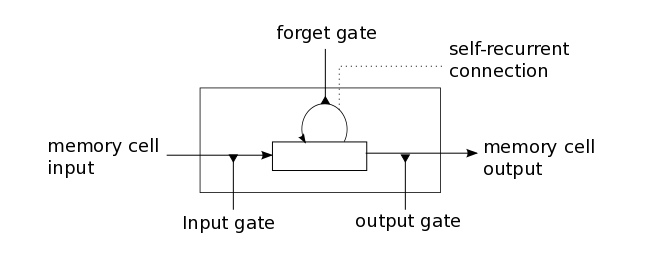

The gates serve to modulate the interactions between the memory cell itself and its environment. The input gate can allow incoming signal to alter the state of the memory cell or block it. On the other hand, the output gate can allow the state of the memory cell to have an effect on other neurons or prevent it. Finally, the forget gate can modulate the memory cell’s self-recurrent connection, allowing the cell to remember or forget its previous state, as needed.

I believe the biggest difference between the NLP and financial analysis is that language has some guarantee of structure, it’s just that the rules of the structure are vague. Markets, on the other hand, don’t come with a promise of a learnable structure, that such a structure exists is the assumption that this project would prove or disprove (rather it might prove or disprove if I can find that structure).

Assuming that a structure exists; the idea of summarizing the current state of the market in the same way we encode the semantics of a paragraph seems plausible to me.

## A Data-Driven Approach To Cryptocurrency Speculation

*How do Bitcoin markets behave? What are the causes of the sudden spikes and dips in cryptocurrency values? How can we predict what will happen next?*

Research on the attributes of cryptocurrencies has made steady progress but has a long way to go. Most researchers analyze user sentiments related to cryptocurrencies on social media, e.g., Twitter, or quantified Web search queries on search engines, such as Google, as well as fluctuations in price and trade volume to determine any relation [\[6–10\]](#ref6to10). Past studies have been limited to Bitcoin because the large amount of data that it provides eliminates the need to build a model to predict fluctuations in the price and number of transactions of diverse cryptocurrencies.

Articles on cryptocurrencies, such as Bitcoin, are rife with speculation these days, with hundreds of self-proclaimed experts advocating for the trends that they expect to emerge. What is lacking from many of these analyses is a strong data analysis foundation to backup the claims. 

So, I felt that analysis of the top headlines on the first page of Google News results for the term **Bitcoin** to predict its closing price for the next day seemed like the most unbiased approach to resolving the biased opinions strewn around the web. I also felt exclusion of the **"Price"** suffix was justified by the fact that its inclusion led to Google News returning those biased news articles as opposed to just news revolving around Bitcoin that I feel is more relevant for my unbiased prediction of closing prices.

This approach also resonates with my personal approach to track the closing prices of the cryptocurrencies I have invested in. I always find myself skimming through the most important headlines on the first page of the Google News results. Extrapolation of my research method to apply to a sample of the population representing crytocurrency investors also seems fair. Don't agree? [This article](https://www.bloomberg.com/news/articles/2017-11-07/bitcoin-rally-is-eroding-gold-s-appeal-top-online-vaulter-says) on Bloomberg Markets does! 

In a nutshell, the article suggests that, according to Google Trends, global searches for “buy bitcoin” have overtaken “buy gold” after previously exceeding searches for how to purchase silver.

**Note** - Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak.

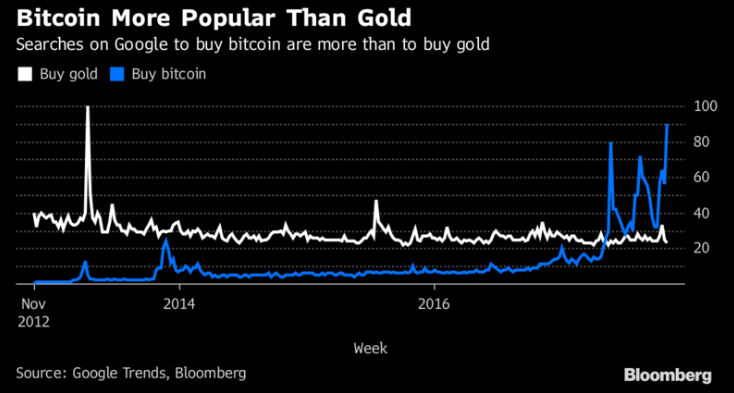

## Input Data

### Initial Features Set

My initial features set include the Adjusted Open, Adjusted High, Adjusted Low, Adjusted Close, Adjusted Volume for BTC, Adjusted Volume for Currency and Weighted Price for Bitcoin retrieved using [Quandl's free Bitcoin API](https://blog.quandl.com/api-for-bitcoin-data) for dates ranging from January 7, 2014 to March 12, 2018.

I used pickle to serialize and save the downloaded data as a file, which will prevent my script from re-downloading the same data each time I run the script.

In [1]:
# Define Quandl Helper Function to download and cache bitcoin dataset from Quandl
import json
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

    #CODE CHANGES -BALAJI
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df


# Pull Kraken BTC exchange historical pricing data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

btc_usd_price_kraken.head()

Loaded BCHARTS/KRAKENUSD from cache


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [2]:
# Chart the BTC close pricing data
#% matplotlib inline
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Close'])
py.iplot([btc_trace])

### Observations

There are a few notable down-spikes, particularly in late 2014 and early 2016. These spikes are specific to the Kraken dataset, and I obviously don't want them to be reflected in my overall pricing analysis.

The nature of Bitcoin exchanges is that the pricing is determined by supply and demand, hence no single exchange contains a true "master price" of Bitcoin. To solve this issue, along with that of down-spikes, I pulled data from three more major Bitcoin changes to calculate an aggregate Bitcoin price index.

In [3]:
# Pull pricing data for 3 more BTC exchanges
exchanges = ['COINBASE','BITSTAMP','ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Cached BCHARTS/COINBASEUSD at BCHARTS-COINBASEUSD.pkl
Cached BCHARTS/BITSTAMPUSD at BCHARTS-BITSTAMPUSD.pkl
Cached BCHARTS/ITBITUSD at BCHARTS-ITBITUSD.pkl


In [4]:
# Merge All Of The Pricing Data Into A Single Dataframe
def merge_dfs_on_column(dataframes, labels, col):
    # Merge a single column of each dataframe into a new combined dataframe
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

# Merge the BTC price dataseries' into a single dataframe on their "Close Price" column
btc_usd_datasets_close = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Close')
btc_usd_datasets_open = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Open')
btc_usd_datasets_high = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'High')
btc_usd_datasets_low = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Low')

btc_usd_datasets_close.tail()

,BITSTAMP,COINBASE,ITBIT,KRAKEN
Date,,,,
2018-03-16,8258.54,8275.00,8268.00,NaN
2018-03-17,7860.83,7857.60,7882.13,NaN
2018-03-18,8188.24,8192.00,8198.65,NaN
2018-03-19,8596.93,8589.00,8595.66,NaN
2018-03-20,8940.11,8940.45,8970.30,NaN


In [6]:
# Visualize The Pricing Datasets

# Helper function to provide a single-line command to compare each column in the dataframe
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    #Generate a scatter plot of the entire dataframe
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)
    
# Plot all of the BTC exchange closing prices
df_scatter(btc_usd_datasets_close, 'Bitcoin Closing Price (USD) By Exchange')

### Observations

Although the four series follow roughly the same path, there are various irregularities in each that should be eliminated. Since the price of Bitcoin has never been equal to zero in the timeframe that I was examining it makes sense to remove all of the zero values from the combined dataframe.

In [7]:
# Remove "0" values
btc_usd_datasets_close.replace(0, np.nan, inplace=True)
btc_usd_datasets_open.replace(0, np.nan, inplace=True)
btc_usd_datasets_high.replace(0, np.nan, inplace=True)
btc_usd_datasets_low.replace(0, np.nan, inplace=True)

# Plot the cleaned dataframe
df_scatter(btc_usd_datasets_close, 'Bitcoin Closing Price (USD) By Exchange')

In [8]:
# Calculate the average BTC closing price as a new column
btc_usd_datasets_close['avg_btc_close_price_usd'] = btc_usd_datasets_close.mean(axis=1)
btc_usd_datasets_open['avg_btc_open_price_usd'] = btc_usd_datasets_open.mean(axis=1)
btc_usd_datasets_high['avg_btc_high_price_usd'] = btc_usd_datasets_high.mean(axis=1)
btc_usd_datasets_low['avg_btc_low_price_usd'] = btc_usd_datasets_low.mean(axis=1)

# Plot the average BTC closing price
btc_trace = go.Scatter(x=btc_usd_datasets_close.index, y=btc_usd_datasets_close['avg_btc_close_price_usd'])
py.iplot([btc_trace])

In [10]:
btc_usd_datasets_close_final = btc_usd_datasets_close['avg_btc_close_price_usd'].copy()
btc_usd_datasets_open_final = btc_usd_datasets_open['avg_btc_open_price_usd'].copy()
btc_usd_datasets_high_final = btc_usd_datasets_high['avg_btc_high_price_usd'].copy()
btc_usd_datasets_low_final = btc_usd_datasets_low['avg_btc_low_price_usd'].copy()

btc_usd_datasets_close_final = btc_usd_datasets_close_final.reset_index()
btc_usd_datasets_open_final = btc_usd_datasets_open_final.reset_index()
btc_usd_datasets_high_final = btc_usd_datasets_high_final.reset_index()
btc_usd_datasets_low_final = btc_usd_datasets_low_final.reset_index()

btc_usd_datasets_open_final.columns = ['Date','Average Open Price (USD)']
btc_usd_datasets_high_final.columns = ['Date','Average High Price (USD)']
btc_usd_datasets_low_final.columns = ['Date','Average Low Price (USD)']
btc_usd_datasets_close_final.columns = ['Date','Average Close Price (USD)']

btc_usd_datasets_close_final.head()

,Date,Average Close Price (USD)
0,2011-09-13,5.97
1,2011-09-14,5.53
2,2011-09-15,5.13
3,2011-09-16,4.85
4,2011-09-17,4.87


In [11]:
btc_usd_datasets_final_1 = pd.merge(btc_usd_datasets_open_final, btc_usd_datasets_high_final, on='Date')
btc_usd_datasets_final_2 = pd.merge(btc_usd_datasets_low_final, btc_usd_datasets_close_final, on='Date')                                  
btc_usd_datasets_final = pd.merge(btc_usd_datasets_final_1, btc_usd_datasets_final_2, on='Date') 
btc_usd_datasets_final.to_csv('BTC_USD.csv', index=False)
btc_usd_datasets_final.head()                                   

,Date,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
0,2011-09-13,5.80,6.00,5.65,5.97
1,2011-09-14,5.58,5.72,5.52,5.53
2,2011-09-15,5.12,5.24,5.00,5.13
3,2011-09-16,4.82,4.87,4.80,4.85
4,2011-09-17,4.87,4.87,4.87,4.87


### Secondary Features Set

This features set builds out my dataframe from a csv file named [**BTC_USD.csv**](BTC_USD.csv) that I generated by extending the protocol governing the definition of my initial features set.

## The model in theory

I am going to use 4 features: The **close price** and three extra technical indicators.
- MACD (Trend Indicator)
- Stochastics (Momentum Indicator)
- Average True Range (Volume Indicator)

## Functions

### Trend Indicator

[What is a trend?](https://www.investopedia.com/university/technical/techanalysis3.asp)

**Exponential Moving Average:** Is a type of infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero. It is similar to a simple moving average, except that more weight is given to the latest data. It's also known as the exponentially weighted moving average. This type of moving average reacts faster to recent price changes than a simple moving average. The 12- and 26-day EMAs are the most popular short-term averages and they are used to create indicators like the moving average convergence divergence (MACD) and the percentage price oscillator (PPO). 

![alt text](EMA.png "EMA")

**MACD:**  The Moving Average Convergence/Divergence oscillator (MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average.
<img src="http://i68.tinypic.com/289ie1l.png">

### Momentum Indicator

[What is momentum?](https://www.investopedia.com/terms/m/momentum.asp?ad=dirN&qo=investopediaSiteSearch&qsrc=0&o=40186)

**Stochastics oscillator:** The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods. It measures whether the closing price of a security is closer to the high or the low. It is based on the assumption that when a market is trending upward, the closing price will be closer to the highest price, and, when it is trending downward, the closing price will be closer to the lowest price.

<img src="http://i66.tinypic.com/2vam3uo.png">

### Volume Indicator

[What is volume?](https://www.investopedia.com/terms/v/volume.asp)

**Average True Range:** Is an indicator to measure the volalitility (NOT price direction). The true range indicator is the largest of:
- Method A: Current High less the current Low
- Method B: Current High less the previous Close (absolute value)
- Method C: Current Low less the previous Close (absolute value)

The average true range is a moving average, generally 14 days, of the true ranges. Basically a stock experiencing a high level of volatility has a higher ATR, and a low volatility stock has a lower ATR. 

Calculation:
<img src="http://i68.tinypic.com/e0kggi.png">

In [12]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    
    return Histogram

def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['Average High Price (USD)']-df['Average Low Price (USD)'])
    '''
    Method B: Current High less the previous Close (absolute value)
    '''
    df['H-PC'] = abs(df['Average High Price (USD)']-df['Average Close Price (USD)'].shift(1))
    '''
    Method C: Current Low less the previous Close (absolute value)
    '''
    df['L-PC'] = abs(df['Average Low Price (USD)']-df['Average Close Price (USD)'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

### Read Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

df = pd.read_csv('BTC_USD.csv',usecols=[1,2,3,4])

dfPrices = pd.read_csv('BTC_USD.csv',usecols=[4])

In [14]:
dfPrices.head(2)

,Average Close Price (USD)
0,5.97
1,5.53


## Plot Data

### Plotting Price

In [15]:
price = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()

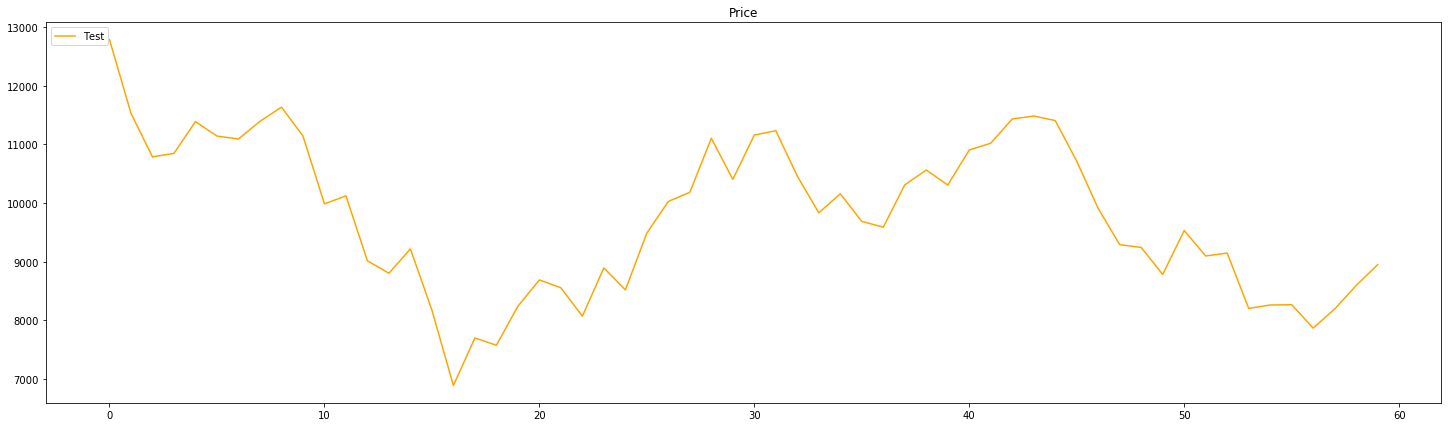

In [16]:
prices = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()
plt.figure(figsize=(25,7))
plt.plot(prices,label='Test',color='orange')
plt.title('Price')
plt.legend(loc='upper left')
plt.show()

### Plotting MACD

In [17]:
macd = MACD(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],12,26,9)

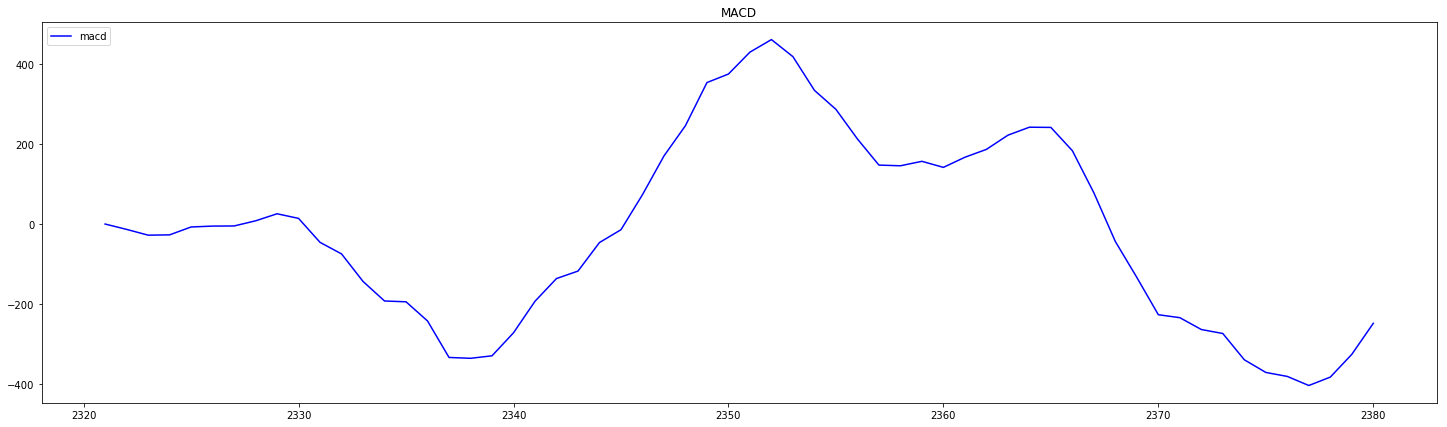

In [18]:
plt.figure(figsize=(25,7))
plt.plot(macd,label='macd',color='blue')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

### Plotting Stochastics Oscillator

In [19]:
stochastics = stochastics_oscillator(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],14)

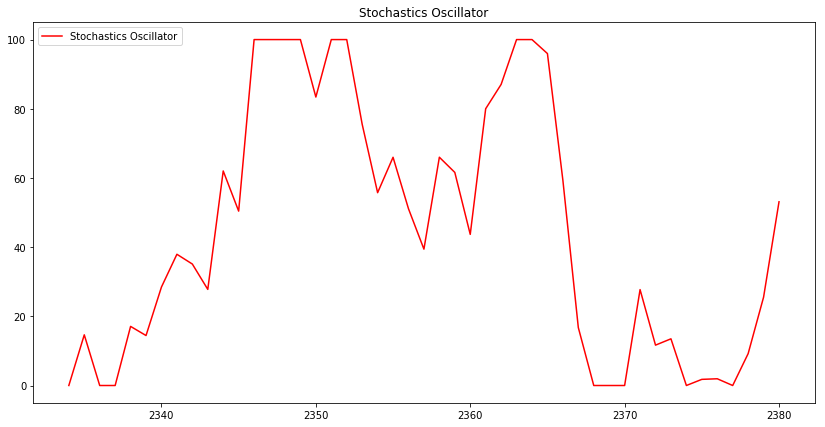

In [20]:
plt.figure(figsize=(14,7))
#First 100 points due to extreme density
plt.plot(stochastics[0:100],label='Stochastics Oscillator',color='red')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

### Plotting Average True Range

In [21]:
atr = ATR(df.iloc[len(df.index)-60:len(df.index)],14)

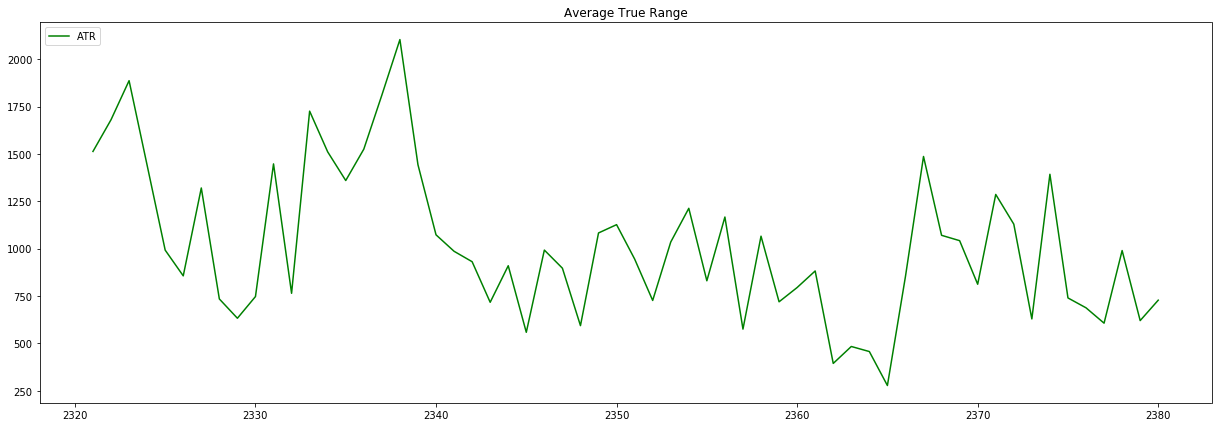

In [22]:
plt.figure(figsize=(21,7))
#First 100 points due to extreme density
plt.plot(atr[0:100],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

## Create Final Dataframe and Save Data

In [23]:
dfPriceShift = dfPrices.shift(-1)
dfPriceShift.rename(columns={'Average Close Price (USD)':'Average Close Price Target (USD)'}, inplace=True)
dfPriceShift.head(2)

,Average Close Price Target (USD)
0,5.53
1,5.13


In [24]:
macd = MACD(dfPrices,12,26,9)
macd.rename(columns={'Average Close Price (USD)':'MACD'}, inplace=True)

In [25]:
stochastics = stochastics_oscillator(dfPrices,14)
stochastics.rename(columns={'Average Close Price (USD)':'Stochastics'}, inplace=True)

In [26]:
atr = ATR(df,14)
atr.rename(columns={0:'ATR'}, inplace=True)

In [27]:
final_data = pd.concat([dfPrices,dfPriceShift,macd,stochastics,atr], axis=1)
# Delete the entries with missing values (where the stochastics couldn't be computed yet) 
final_data = final_data.dropna()

In [28]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 13 to 2379
Data columns (total 5 columns):
Average Close Price (USD)           2275 non-null float64
Average Close Price Target (USD)    2275 non-null float64
MACD                                2275 non-null float64
Stochastics                         2275 non-null float64
ATR                                 2275 non-null float64
dtypes: float64(5)
memory usage: 106.6 KB


In [29]:
final_data.head(10)

,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
13,4.80,4.92,0.012715,0.0,1.26
14,4.92,4.82,-0.018544,9.6,0.12
15,4.82,4.82,-0.044095,1.6,0.10
69,2.25,2.59,-0.036685,0.0,0.75
109,4.58,5.00,0.054695,100.0,0.37
110,5.00,5.00,0.080891,100.0,0.42
111,5.00,5.29,0.093879,100.0,0.00
112,5.29,5.57,0.117478,100.0,0.32
113,5.57,6.65,0.146935,100.0,0.64
114,6.65,6.00,0.235500,100.0,1.08


In [30]:
final_data.to_csv('BTC_USD_TechnicalIndicators.csv',index=False)

# First Framework - Recurrent Neural Network trained on Initial Features (Historical Bitcoin Prices) and Secondary Features ( Fiat Currency Stock Market Technical Indicators)

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## Read the data

In [32]:
df = pd.read_csv('BTC_USD_TechnicalIndicators.csv')
df.head(2)

,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
0,4.80,4.92,0.012715,0.0,1.26
1,4.92,4.82,-0.018544,9.6,0.12


In [33]:
#extra code
#CODE CHANGES - BALAJI
dfmissing = pd.read_csv('BTC_USD_TechnicalIndicators.csv',usecols=[2,3,4])
dfmissing.head()



,MACD,Stochastics,ATR
0,0.012715,0.0,1.26
1,-0.018544,9.6,0.12
2,-0.044095,1.6,0.10
3,-0.036685,0.0,0.75
4,0.054695,100.0,0.37


In [34]:
#CODE CHANGES - BALAJI
dfmissing['Average Sentiment Score'] = dfmissing.mean(axis=1)
#dfmissing_final = dfmissing['Average Sentiment Score'].copy()
dfmissing.to_csv('bitcoin_news_average_sentiments_2014_2017.csv', index= False)
dfmissing.head() 

,MACD,Stochastics,ATR,Average Sentiment Score
0,0.012715,0.0,1.26,0.424238
1,-0.018544,9.6,0.12,3.233819
2,-0.044095,1.6,0.10,0.551968
3,-0.036685,0.0,0.75,0.237772
4,0.054695,100.0,0.37,33.474898


In [35]:
dfmissing_new = pd.read_csv('bitcoin_news_average_sentiments_2014_2017.csv',usecols=[3])
dfmissing_new.head()

,Average Sentiment Score
0,0.424238
1,3.233819
2,0.551968
3,0.237772
4,33.474898


## Normalize the data

In [36]:
dfNorm = (df - df.mean()) / (df.max() - df.min())
dfNorm.head()

,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
0,-0.064843,-0.065040,0.000604,-0.597426,-0.023211
1,-0.064836,-0.065046,0.000587,-0.501426,-0.023452
2,-0.064842,-0.065046,0.000573,-0.581426,-0.023456
3,-0.064974,-0.065161,0.000577,-0.597426,-0.023319
4,-0.064854,-0.065036,0.000626,0.402574,-0.023399


## Defining the Hyperparameters

In [37]:
num_epochs = 500
total_series_length = len(df.index)
# Sequence Size
truncated_backprop_length = 3
# Number of neurons
state_size = 12 
num_classes = 1
num_features = 4
batch_size = 1
num_batches = total_series_length//batch_size//truncated_backprop_length
min_test_size = 100

    
print('The total length of the series is: {}'.format(total_series_length))
print('The current configuration gives us {} batches of {} observation each, where each one is looking {} steps in the past'.format(num_batches,batch_size,truncated_backprop_length))

The total length of the series is: 2275
The current configuration gives us 758 batches of 1 observation each, where each one is looking 3 steps in the past


## Splitting the data into Training and Testing sets

In [38]:
dfTrain = dfNorm[df.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(dfNorm.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(dfNorm.index)-i
        break

dfTest =  dfNorm[df.index >= test_first_idx]

In [39]:
dfTrain.head()

,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
0,-0.064843,-0.065040,0.000604,-0.597426,-0.023211
1,-0.064836,-0.065046,0.000587,-0.501426,-0.023452
2,-0.064842,-0.065046,0.000573,-0.581426,-0.023456
3,-0.064974,-0.065161,0.000577,-0.597426,-0.023319
4,-0.064854,-0.065036,0.000626,0.402574,-0.023399


In [40]:
dfTest.head()

,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
2173,0.763448,0.704135,0.486208,0.326071,0.675924
2174,0.704325,0.710196,0.464327,0.164927,0.632325
2175,0.710386,0.796700,0.432397,0.167884,0.546025
2176,0.796889,0.819422,0.453625,0.402574,0.484200
2177,0.819611,0.780790,0.463793,0.402574,0.270591


In [41]:
xTrain = dfTrain[['Average Close Price (USD)','MACD','Stochastics','ATR']].as_matrix()
yTrain = dfTrain['Average Close Price Target (USD)'].as_matrix()

In [42]:
print(xTrain[0:3],'\n',yTrain[0:3])

[[-6.48426208e-02  6.03740856e-04 -5.97426238e-01 -2.32113946e-02]
 [-6.48364307e-02  5.87067875e-04 -5.01426238e-01 -2.34516510e-02]
 [-6.48415891e-02  5.73439673e-04 -5.81426238e-01 -2.34558661e-02]] 
 [-0.06504042 -0.06504557 -0.06504557]


In [43]:
xTest = dfTest[['Average Close Price (USD)','MACD','Stochastics','ATR']].as_matrix()
yTest = dfTest['Average Close Price Target (USD)'].as_matrix()

In [44]:
print(xTest[0:3],'\n',yTest[0:3])

[[0.76344753 0.48620819 0.32607051 0.67592379]
 [0.70432523 0.46432665 0.16492736 0.63232515]
 [0.71038607 0.43239674 0.16788374 0.54602461]] 
 [0.70413473 0.71019568 0.79670034]


## Visualizing the starting average close price data

In [45]:
start_avg_cp_train_trace = go.Scatter(y=xTrain[:,0])
layout = dict(title = 'Train Data (' + str(len(xTrain)) + ' data points)')
fig = dict(data=[start_avg_cp_train_trace], layout=layout)
py.iplot(fig)

In [46]:
start_avg_cp_test_trace = go.Scatter(y=xTest[:,0])
layout = dict(title = 'Test Data (' + str(len(xTest)) + ' data points)')
fig = dict(data=[start_avg_cp_test_trace], layout=layout)
py.iplot(fig)

## Placeholders

In [47]:
batchX_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_features],name='data_ph')
batchY_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_classes],name='target_ph')

## Weights and Biases

Since I have considered a 3 layer neural network comprising of:

1. Input Layer
2. Hidden Recurrent Layer
3. Output Layer

and output is a result of linear activation of last layer of RNN; we need only a single pair Weight and Bias.

In [48]:
weight = tf.Variable(tf.truncated_normal([state_size,num_classes]))
bias = tf.Variable(tf.constant(0.1,shape=[num_classes]))
# Unpack
labels_series = tf.unstack(batchY_placeholder, axis=1)

## Forward Pass (Unroll the cell)

Input to RNN

In [49]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=state_size)

states_series, current_state = tf.nn.dynamic_rnn(cell=cell,inputs=batchX_placeholder,dtype=tf.float32)

states_series = tf.transpose(states_series,[1,0,2])

C:\Users\Balaji\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



## Backward Pass (Output)

In [50]:
last_state = tf.gather(params=states_series,indices=states_series.get_shape()[0]-1)
last_label = tf.gather(params=labels_series,indices=len(labels_series)-1)

## Prediction, Loss and Optimizer

In [51]:
prediction = tf.matmul(last_state,weight) + bias
prediction

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [52]:
loss = tf.reduce_mean(tf.squared_difference(last_label,prediction))
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

C:\Users\Balaji\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:93: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



In [53]:
loss_list = []
test_pred_list = []

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    for epoch_idx in range(num_epochs):
                
        print('Epoch {}'.format(epoch_idx))
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length * batch_size
        
            
            batchX = xTrain[start_idx:end_idx,:].reshape(batch_size,truncated_backprop_length,num_features)
            batchY = yTrain[start_idx:end_idx].reshape(batch_size,truncated_backprop_length,1)
            
            feed = {batchX_placeholder : batchX, batchY_placeholder : batchY}
            
            # TRAIN
            _loss,_train_step,_pred,_last_label,_prediction = sess.run(
                fetches=[loss,train_step,prediction,last_label,prediction],
                feed_dict = feed
            )
            
            loss_list.append(_loss)
            
           
            
            if(batch_idx % 200 == 0):
                print('Step {} - Loss: {:.6f}'.format(batch_idx,_loss))
                
    # TEST 
    for test_idx in range(len(xTest) - truncated_backprop_length):
        
        testBatchX = xTest[test_idx:test_idx+truncated_backprop_length,:].reshape((1,truncated_backprop_length,num_features))        
        testBatchY = yTest[test_idx:test_idx+truncated_backprop_length].reshape((1,truncated_backprop_length,1))

        feed = {batchX_placeholder : testBatchX,
            batchY_placeholder : testBatchY}

        # test_pred contains 'window_size' predictions, we want the last one
        _last_state,_last_label,test_pred = sess.run([last_state,last_label,prediction],feed_dict=feed)
        # The last test_pred
        test_pred_list.append(test_pred[-1][-1]) 

Epoch 0
Step 0 - Loss: 0.779856
Step 200 - Loss: 0.006406
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000004
Epoch 1
Step 0 - Loss: 0.041286
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000215
Step 600 - Loss: 0.000086
Epoch 2
Step 0 - Loss: 0.002580
Step 200 - Loss: 0.000008
Step 400 - Loss: 0.000197
Step 600 - Loss: 0.000027
Epoch 3
Step 0 - Loss: 0.000013
Step 200 - Loss: 0.000020
Step 400 - Loss: 0.000158
Step 600 - Loss: 0.000016
Epoch 4
Step 0 - Loss: 0.000057
Step 200 - Loss: 0.000026
Step 400 - Loss: 0.000119
Step 600 - Loss: 0.000013
Epoch 5
Step 0 - Loss: 0.000009
Step 200 - Loss: 0.000021
Step 400 - Loss: 0.000092
Step 600 - Loss: 0.000013
Epoch 6
Step 0 - Loss: 0.000008
Step 200 - Loss: 0.000009
Step 400 - Loss: 0.000081
Step 600 - Loss: 0.000015
Epoch 7
Step 0 - Loss: 0.000003
Step 200 - Loss: 0.000003
Step 400 - Loss: 0.000082
Step 600 - Loss: 0.000025
Epoch 8
Step 0 - Loss: 0.000107
Step 200 - Loss: 0.000007
Step 400 - Loss: 0.000080
Step 600 - Loss: 0.000042
Epoch 9
St

Epoch 74
Step 0 - Loss: 0.000463
Step 200 - Loss: 0.000002
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000002
Epoch 75
Step 0 - Loss: 0.000504
Step 200 - Loss: 0.000002
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 76
Step 0 - Loss: 0.000123
Step 200 - Loss: 0.000002
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000002
Epoch 77
Step 0 - Loss: 0.000584
Step 200 - Loss: 0.000002
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 78
Step 0 - Loss: 0.000208
Step 200 - Loss: 0.000002
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000002
Epoch 79
Step 0 - Loss: 0.000634
Step 200 - Loss: 0.000001
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 80
Step 0 - Loss: 0.000029
Step 200 - Loss: 0.000001
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 81
Step 0 - Loss: 0.000904
Step 200 - Loss: 0.000001
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 82
Step 0 - Loss: 0.000200
Step 200 - Loss: 0.000001
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
E

Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 148
Step 0 - Loss: 0.000014
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 149
Step 0 - Loss: 0.000867
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 150
Step 0 - Loss: 0.000372
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 151
Step 0 - Loss: 0.000164
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 152
Step 0 - Loss: 0.001264
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000001
Epoch 153
Step 0 - Loss: 0.000168
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 154
Step 0 - Loss: 0.000727
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 155
Step 0 - Loss: 0.000978
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 156
Step 0 - Loss: 0.000377
Step 200 - Loss: 0

Step 600 - Loss: 0.000001
Epoch 221
Step 0 - Loss: 0.000264
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 222
Step 0 - Loss: 0.000395
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 223
Step 0 - Loss: 0.001131
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 224
Step 0 - Loss: 0.000399
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 225
Step 0 - Loss: 0.000786
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 226
Step 0 - Loss: 0.000235
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 227
Step 0 - Loss: 0.001096
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 228
Step 0 - Loss: 0.000452
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000001
Epoch 229
Step 0 - Loss: 0.000246
Step 200 - Loss: 0.000000
Step 400 - Loss: 0

Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 295
Step 0 - Loss: 0.000318
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000001
Epoch 296
Step 0 - Loss: 0.000597
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000001
Epoch 297
Step 0 - Loss: 0.000399
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000001
Epoch 298
Step 0 - Loss: 0.000329
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000001
Epoch 299
Step 0 - Loss: 0.000666
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000001
Epoch 300
Step 0 - Loss: 0.000246
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000001
Epoch 301
Step 0 - Loss: 0.000314
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000001
Epoch 302
Step 0 - Loss: 0.000399
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000000
Step 600 - Loss: 0.000001
Epoch 303
Step 0 - Loss: 0

Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 368
Step 0 - Loss: 0.000006
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 369
Step 0 - Loss: 0.000007
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 370
Step 0 - Loss: 0.000004
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 371
Step 0 - Loss: 0.000006
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 372
Step 0 - Loss: 0.000010
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 373
Step 0 - Loss: 0.000016
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000003
Step 600 - Loss: 0.000000
Epoch 374
Step 0 - Loss: 0.000018
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 375
Step 0 - Loss: 0.000012
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000002
Step 600 - Loss: 0.000000
Epoch 376
Step 0 - Loss: 0.000016
Step 200 - Loss: 0

Step 600 - Loss: 0.000000
Epoch 441
Step 0 - Loss: 0.000200
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 442
Step 0 - Loss: 0.000166
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 443
Step 0 - Loss: 0.000158
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 444
Step 0 - Loss: 0.000141
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 445
Step 0 - Loss: 0.000110
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 446
Step 0 - Loss: 0.000121
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 447
Step 0 - Loss: 0.000119
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 448
Step 0 - Loss: 0.000121
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000001
Step 600 - Loss: 0.000000
Epoch 449
Step 0 - Loss: 0.000142
Step 200 - Loss: 0.000000
Step 400 - Loss: 0

In [54]:
trace = go.Scatter(
    x = np.arange(0,len(loss_list)),
    y = loss_list,
    mode = 'markers', 
)

layout = go.Layout(
    title= "Loss",  
    xaxis=dict(
    title='epochs',
    ), 
    yaxis=dict(
    title='loss',
    )  
)

data = go.Data([trace])

fig = go.Figure(data = data, layout = layout)

py.iplot(fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [55]:
avg_cp_trace = go.Scatter(y=yTest, name = 'Average Close Price (USD)', line = dict(color = ('rgb(205, 12, 24)'), width = 4))
pred_avg_cp_trace = go.Scatter(y=test_pred_list, name = 'Predicted Average Close Price (USD)', line = dict(color = ('rgb(22, 96, 167)'), width = 4))
layout = dict(title = 'Average Close Price (USD) vs Predicted Average Close Price (USD)')
fig = dict(data=[avg_cp_trace, pred_avg_cp_trace], layout=layout)
py.iplot(fig)

# Progress & Future Work

Evalutation of first framework which is RNN performed better results. This could be as a result of a wider range of more accurate unbiased features (Technical Stock Market Indicators).
In the future we will be doing sentimental analysis and convert the mood(Buy & sell) to score between 0 to 1. This score will be used to predict the bitcoin market prices in the future.
In the future I hope to extend my hypothesis to include more relevant features and also consider better hyperparameter optimization techniques to ensure better prediction results based on opinion analysis on a wider range of audience.

# Twitter Sentimental Analysis

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from tweepy import OAuthHandler

In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = '1VjOzY0RJxH7yUyg1TykSmdxk'
CONSUMER_SECRET = 'ALPYNOQ7qlJsfmf4B54TyK1F5nL8U72Z1Afw4eyllm5MZza3mj'

# Access:
ACCESS_TOKEN  = '806020958708338688-zzgkg10PtN5CHWTTu1yFoUTnxt0v77R'
ACCESS_SECRET = 'rDplRyw9KGh5nAm3yUuzzchLwNWOkbBqNpDlKF5jgN3g7'

In [3]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="@Bitcoin", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Bitcoin Core Loses Out to Bitcoin Cash – Is it the Beginning of the End?

https://t.co/uZwsWgrq2k

https://t.co/GL22H0fZVo math: How big do blocks need to be to handle twitter on-chain?

https://t.co/bkBnEctMxL

RT @BITCOlNCASH: Continue reading: https://t.co/oTzomZiwAJ
Try Memo: https://t.co/CryLUP3o3t https://t.co/dNDmRynC5v

Join a Bitcoin meetup near you! The next Orange County Bitcoin Cash meetup will be held on Wednesday, April 25th. 

https://t.co/YeKgzqcrcu

Hearing a lot of talk about "utility tokens" these days. Seems like the only "utility" offered by these tokens is s… https://t.co/zOFkiXKxPx



In [5]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Bitcoin Core Loses Out to Bitcoin Cash – Is it...
1,https://t.co/GL22H0fZVo math: How big do block...
2,RT @BITCOlNCASH: Continue reading: https://t.c...
3,Join a Bitcoin meetup near you! The next Orang...
4,"Hearing a lot of talk about ""utility tokens"" t..."
5,RT @BitcoinCashFund: Remember the Barber Ad we...
6,@Dunnestar @r0bbot I am very serious about Bit...
7,"Tell it like it is, @r0bbot https://t.co/pxzOM..."
8,"""Showerthought: By tricking people into sellin..."
9,Developers: Coinbase releases open-source Bitc...


In [7]:
# Internal methods of a single tweet object:
print(dir(tweets[5]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [6]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

986965918700847105
2018-04-19 13:53:06
Twitter Web Client
419
149
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/uZwsWgrq2k', 'expanded_url': 'https://finance.yahoo.com/news/bitcoin-loses-bitcoin-cash-beginning-062359292.html', 'display_url': 'finance.yahoo.com/news/bitcoin-l…', 'indices': [74, 97]}]}


In [8]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [9]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Bitcoin Core Loses Out to Bitcoin Cash – Is it...,97,986965918700847105,2018-04-19 13:53:06,Twitter Web Client,419,149
1,https://t.co/GL22H0fZVo math: How big do block...,111,986946766615601152,2018-04-19 12:37:00,TweetDeck,4,25
2,RT @BITCOlNCASH: Continue reading: https://t.c...,116,986922037770764288,2018-04-19 10:58:44,Twitter Web Client,0,66
3,Join a Bitcoin meetup near you! The next Orang...,139,986921209060143104,2018-04-19 10:55:27,Twitter Web Client,185,57
4,"Hearing a lot of talk about ""utility tokens"" t...",140,986528449895411712,2018-04-18 08:54:45,Twitter Web Client,336,93
5,RT @BitcoinCashFund: Remember the Barber Ad we...,140,986506556563865600,2018-04-18 07:27:46,Twitter Web Client,0,50
6,@Dunnestar @r0bbot I am very serious about Bit...,67,986504562449178625,2018-04-18 07:19:50,Twitter Web Client,31,7
7,"Tell it like it is, @r0bbot https://t.co/pxzOM...",51,986494536837984258,2018-04-18 06:40:00,TweetDeck,114,21
8,"""Showerthought: By tricking people into sellin...",140,986480695252942849,2018-04-18 05:45:00,TweetDeck,151,44
9,Developers: Coinbase releases open-source Bitc...,139,986465847228026880,2018-04-18 04:46:00,TweetDeck,125,47


In [10]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 107.22


In [11]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
From day one, Bitcoin was marketed to the world as a fast &amp; cheap global payments network. Now the BTC crowd says t… https://t.co/lpFJLuRLXQ
Number of likes: 1154
144 characters.

The tweet with more retweets is: 
JPMorgan "stopped letting customers buy cryptocurrency with credit cards in late January and began treating the pur… https://t.co/t26yCtSM1w
Number of retweets: 413
140 characters.



In [12]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

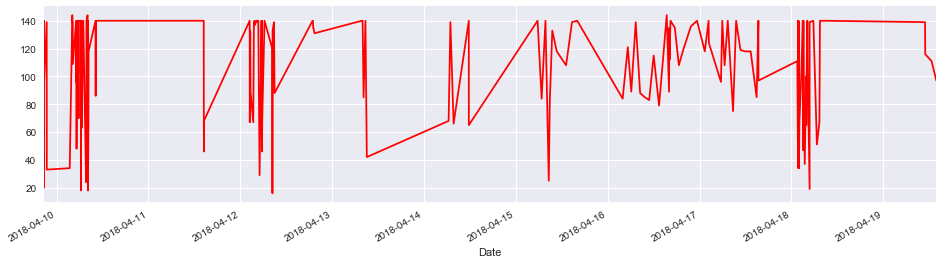

In [13]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

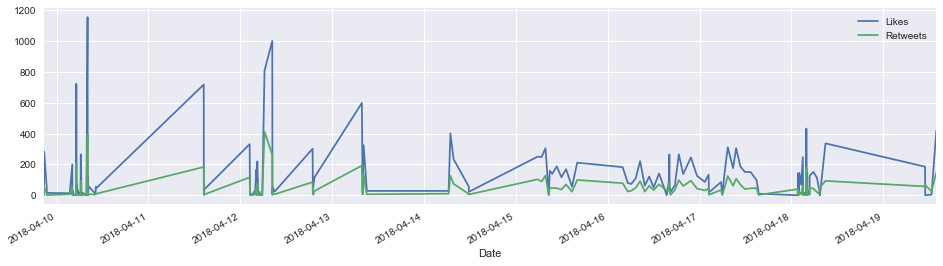

In [14]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [15]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web Client
* TweetDeck


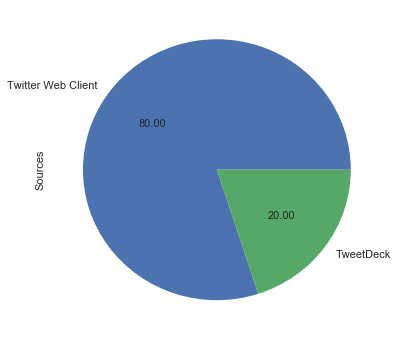

In [16]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [19]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return analysis.sentiment.polarity
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return analysis.sentiment.polarity

In [25]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
data1 = data.round({'SA': 1})
# We display the updated dataframe with the new column:
display(data1.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Bitcoin Core Loses Out to Bitcoin Cash – Is it...,97,986965918700847105,2018-04-19 13:53:06,Twitter Web Client,419,149,-0.3
1,https://t.co/GL22H0fZVo math: How big do block...,111,986946766615601152,2018-04-19 12:37:00,TweetDeck,4,25,0.0
2,RT @BITCOlNCASH: Continue reading: https://t.c...,116,986922037770764288,2018-04-19 10:58:44,Twitter Web Client,0,66,0.0
3,Join a Bitcoin meetup near you! The next Orang...,139,986921209060143104,2018-04-19 10:55:27,Twitter Web Client,185,57,0.0
4,"Hearing a lot of talk about ""utility tokens"" t...",140,986528449895411712,2018-04-18 08:54:45,Twitter Web Client,336,93,0.0
5,RT @BitcoinCashFund: Remember the Barber Ad we...,140,986506556563865600,2018-04-18 07:27:46,Twitter Web Client,0,50,0.0
6,@Dunnestar @r0bbot I am very serious about Bit...,67,986504562449178625,2018-04-18 07:19:50,Twitter Web Client,31,7,-0.4
7,"Tell it like it is, @r0bbot https://t.co/pxzOM...",51,986494536837984258,2018-04-18 06:40:00,TweetDeck,114,21,0.0
8,"""Showerthought: By tricking people into sellin...",140,986480695252942849,2018-04-18 05:45:00,TweetDeck,151,44,0.4
9,Developers: Coinbase releases open-source Bitc...,139,986465847228026880,2018-04-18 04:46:00,TweetDeck,125,47,0.0


In [26]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data1['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data1['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data1['SA'][index] < 0]

In [28]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data1['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data1['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data1['Tweets'])))

Percentage of positive tweets: 36.0%
Percentage of neutral tweets: 54.0%
Percentage de negative tweets: 10.0%


In [ ]:
data1['SA'].to_csv('BTC_USD_TechnicalIndicators.csv',index=False)

# References

<a id='ref1'>\[1\]</a> Reid F, Harrigan M. An analysis of anonymity in the bitcoin system: Springer; 2013.<br>
<a id='ref2'>\[2\]</a> Böhme R, Christin N, Edelman B, Moore T. Bitcoin: Economics, technology, and governance. The Journal of Economic Perspectives. 2015;29(2):213–38.<br>
<a id='ref3'>\[3\]</a> Nakamoto S. Bitcoin: A peer-to-peer electronic cash system. 2008.<br>
<a id='ref4'>\[4\]</a> Kondor D, Pósfai M, Csabai I, Vattay G. Do the rich get richer? An empirical analysis of the Bitcoin transaction network. PloS one. 2014;9(2):e86197 doi: [10.1371/journal.pone.0086197](http://dx.doi.org/10.1371/journal.pone.0086197) [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3914786/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/24505257)<br>
<a id='ref5'>\[5\]</a> Ron D, Shamir A. Quantitative analysis of the full bitcoin transaction graph Financial Cryptography and Data Security: Springer; 2013. p. 6–24.<br>
<a id='ref6to10'>\[6\]</a> Garcia D, Tessone CJ, Mavrodiev P, Perony N. The digital traces of bubbles: feedback cycles between socio-economic signals in the Bitcoin economy. Journal of the Royal Society Interface. 2014;11(99):20140623. [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4233744/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/25100315)<br>
\[7\] Kondor D, Csabai I, Szüle J, Pósfai M, Vattay G. Inferring the interplay between network structure and market effects in Bitcoin. New Journal of Physics. 2014;16(12):125003.<br>
\[8\] Kristoufek L. BitCoin meets Google Trends and Wikipedia: Quantifying the relationship between phenomena of the Internet era. Scientific reports. 2013;3. [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3849639/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/24301322)<br>
\[9\] Kristoufek L. What are the main drivers of the Bitcoin price? Evidence from wavelet coherence analysis. PloS one. 2015;10(4):e0123923 doi: [10.1371/journal.pone.0123923](http://dx.doi.org/10.1371/journal.pone.0123923) [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4398561/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/25874694)<br>
\[10\] Yelowitz A, Wilson M. Characteristics of Bitcoin users: an analysis of Google search data. Applied Economics Letters. 2015;22(13):1030–6.<br>